In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from importlib import reload
from utils import *
import test
import acd

C:\Users\Alekseyl\Envs\absa\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from jupyterthemes import jtplot
# jtplot.style()  # development
jtplot.reset()  # production

In [3]:
w2v = load_w2v()

Loading real w2v...
Done


In [4]:
reload(acd)
acd_ = acd.ACD(w2v)
acd_.train_acd()

Loading tokenizer...
-- ACD:
Loading dataset...
Training...
Evaluating...
F1: 0.7836021505376345


In [13]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
datasets = pd_.load_grid_datasets()

-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
g

Running SVM (baseline, w2v)...
           C  Mean Accuracy
0   0.010000       0.675911
1   0.062105       0.676704
2   0.114211       0.730983
3   0.166316       0.771791
4   0.218421       0.787639
5   0.270526       0.795166
6   0.322632       0.799921
7   0.374737       0.800713
8   0.426842       0.802694
9   0.478947       0.801109
10  0.531053       0.803883
11  0.583158       0.805864
12  0.635263       0.805468
13  0.687368       0.804279
14  0.739474       0.807052
15  0.791579       0.807052
16  0.843684       0.807448
17  0.895789       0.806656
18  0.947895       0.807448
19  1.000000       0.807448
Running SVM (append, w2v)...
           C  Mean Accuracy
0   0.010000       0.676307
1   0.062105       0.746830
2   0.114211       0.762282
3   0.166316       0.775357
4   0.218421       0.785658
5   0.270526       0.791601
6   0.322632       0.800713
7   0.374737       0.803090
8   0.426842       0.804279
9   0.478947       0.804279
10  0.531053       0.806260
11  0.583158    

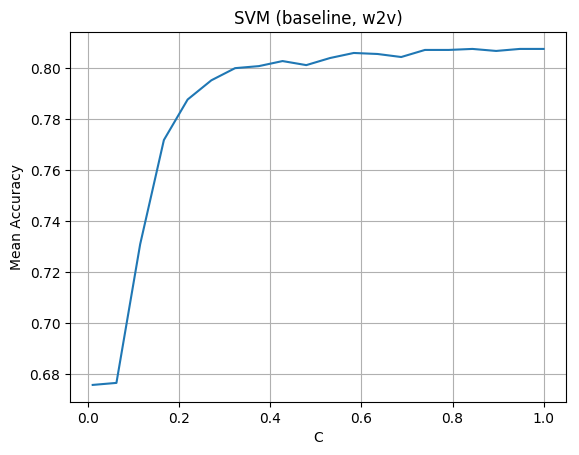

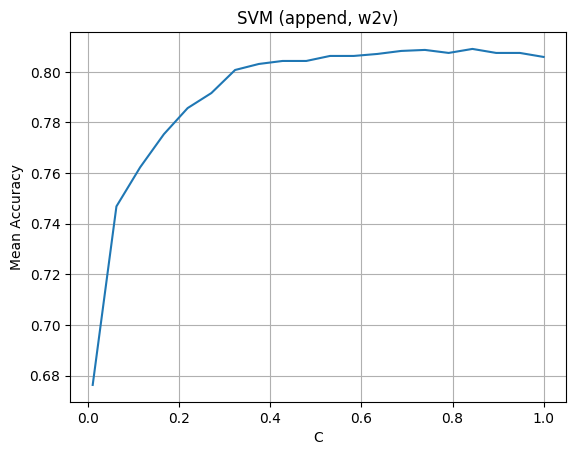

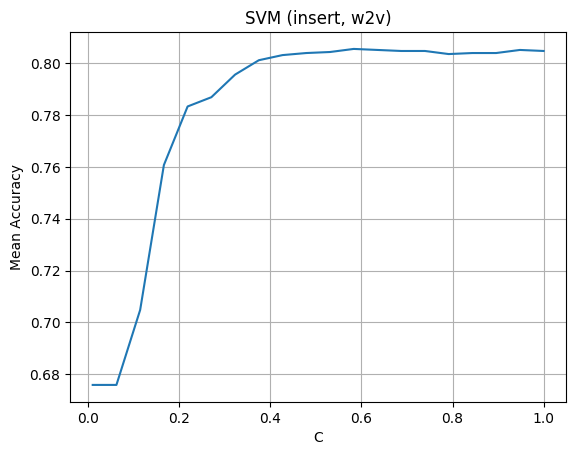

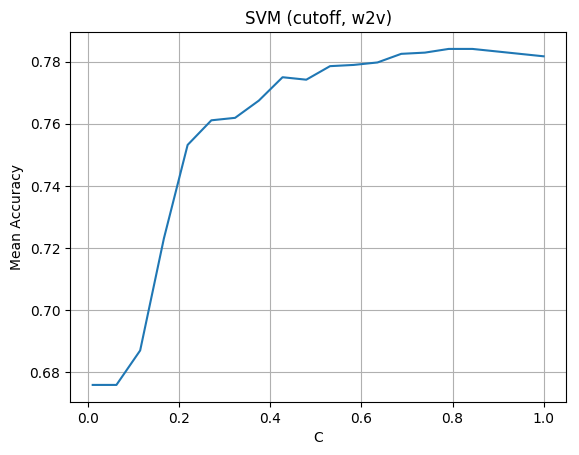

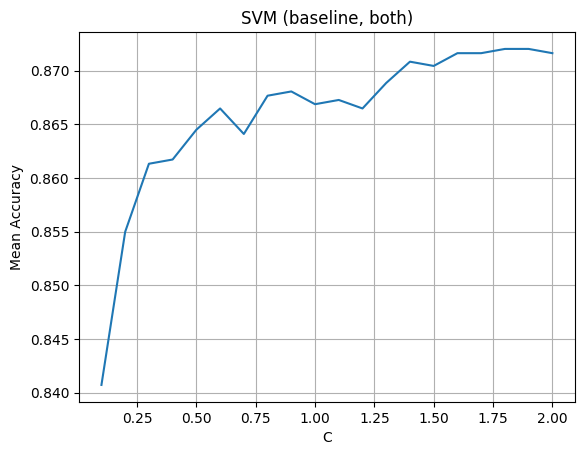

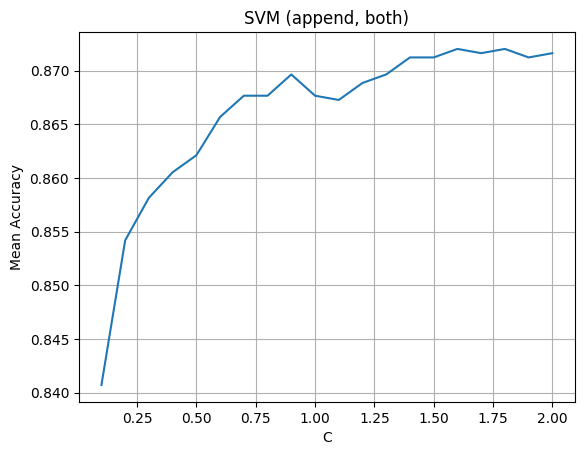

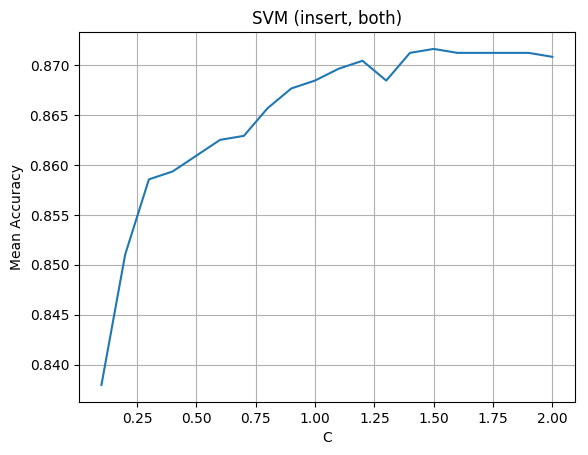

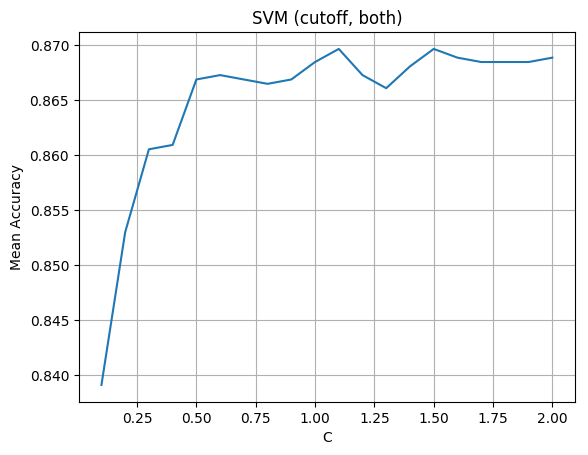

In [14]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
pd_.grid_search_pd(datasets, n_jobs=6)

Running CNN (baseline, w2v)...
-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
Train on 2524 samples, validate on 842 samples
Epoch 1/100
2524/2524 [==============================

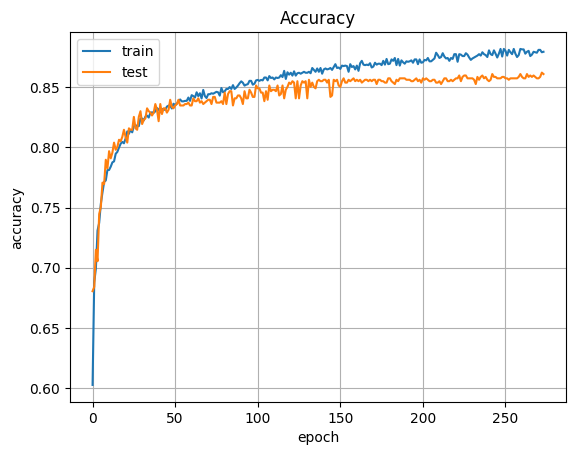

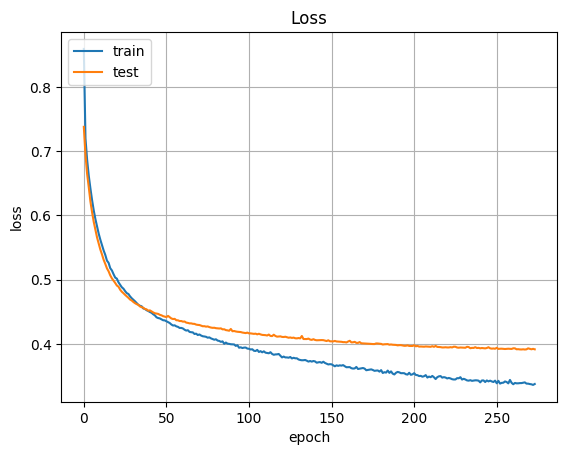

Max val_acc: 0.8622327720184507 (epoch: 273)
Scores: [0.86223277201845072, 0.86460807600950118]
    Mult     Score
0    0.5  0.864608
1    0.6  0.865796
2    0.7  0.864608
3    0.8  0.864608
4    0.9  0.865796
5    1.0  0.866983
6    1.1  0.865796
7    1.2  0.865796
8    1.3  0.865796
9    1.4  0.868171
10   1.5  0.866983
11   1.6  0.866983
12   1.7  0.866983
13   1.8  0.868171
14   1.9  0.866983
15   2.0  0.866983
16   2.1  0.866983
17   2.2  0.866983
18   2.3  0.866983
19   2.4  0.866983
20   2.5  0.868171
21   2.6  0.868171
22   2.7  0.868171
23   2.8  0.869359
24   2.9  0.869359
25   3.0  0.869359
26   3.1  0.869359
27   3.2  0.869359
28   3.3  0.869359
29   3.4  0.869359
30   3.5  0.868171
31   3.6  0.868171
32   3.7  0.866983
33   3.8  0.866983
34   3.9  0.866983
35   4.0  0.866983
36   4.1  0.866983
37   4.2  0.866983
38   4.3  0.866983
39   4.4  0.866983
40   4.5  0.866983
41   4.6  0.868171
42   4.7  0.868171
43   4.8  0.865796
44   4.9  0.865796
max_score_mult: 2.799999999999

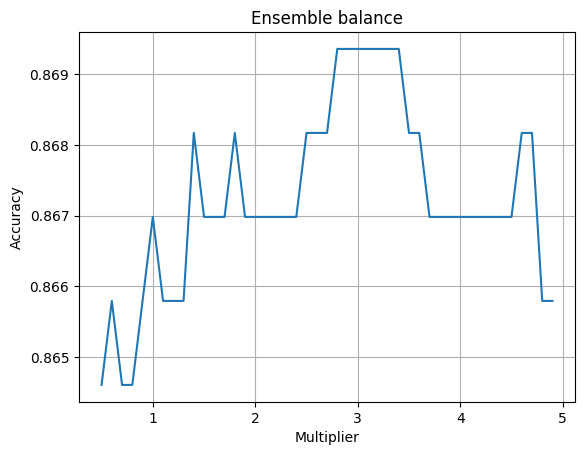

                Модель  Accuracy
0  CNN (baseline, w2v)  0.818290
1    CNN (linear, w2v)  0.839667
2      CNN (tree, w2v)  0.840855
3             Ensemble  0.869359


In [7]:
import polarity
reload(polarity)
pd_ = polarity.PD(w2v, acd_)
pd_.grid_search_pd_keras()

In [15]:
data = pd_.prepare_data(pd_.get_pd_features_map_tree_distance, False)

-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587


-- PD:
Loading tokenizer...
Loading stemmer...
Loading parser...
Loading datasets...
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/1708
get_pd_ds progress: 100/1708
get_pd_ds progress: 200/1708
get_pd_ds progress: 300/1708
get_pd_ds progress: 400/1708
get_pd_ds progress: 500/1708
get_pd_ds progress: 600/1708
get_pd_ds progress: 700/1708
get_pd_ds progress: 800/1708
get_pd_ds progress: 900/1708
get_pd_ds progress: 1000/1708
get_pd_ds progress: 1100/1708
get_pd_ds progress: 1200/1708
get_pd_ds progress: 1300/1708
get_pd_ds progress: 1400/1708
get_pd_ds progress: 1500/1708
get_pd_ds progress: 1600/1708
get_pd_ds progress: 1700/1708
Core NLP Parser preprocessing result pickled
get_pd_ds progress: 0/587
get_pd_ds progress: 100/587
get_pd_ds progress: 200/587
get_pd_ds progress: 300/587
get_pd_ds progress: 400/587
get_pd_ds progress: 500/587
Train on 2524 samples, validate on 842 samples
Epoch 1/274
7s - loss: 0.7911 - acc: 0.6807 - val_loss: 0.7275 - val_acc: 0.6876
Epo

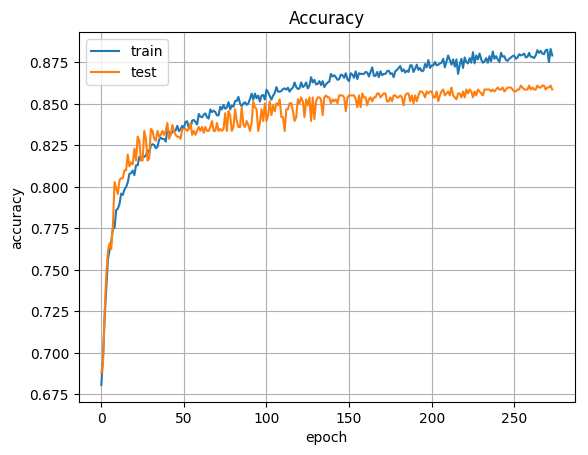

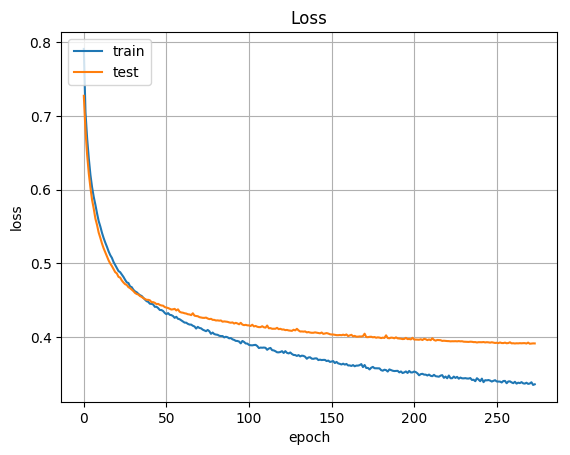

Max val_acc: 0.8610451246950236 (epoch: 265)
Scores: [0.86104512469502359, 0.86460807600950118]
    Mult     Score
0    0.5  0.864608
1    0.6  0.866983
2    0.7  0.865796
3    0.8  0.866983
4    0.9  0.866983
5    1.0  0.865796
6    1.1  0.866983
7    1.2  0.866983
8    1.3  0.868171
9    1.4  0.869359
10   1.5  0.869359
11   1.6  0.869359
12   1.7  0.869359
13   1.8  0.869359
14   1.9  0.868171
15   2.0  0.866983
16   2.1  0.868171
17   2.2  0.868171
18   2.3  0.868171
19   2.4  0.868171
20   2.5  0.868171
21   2.6  0.869359
22   2.7  0.869359
23   2.8  0.869359
24   2.9  0.869359
25   3.0  0.869359
26   3.1  0.869359
27   3.2  0.869359
28   3.3  0.868171
29   3.4  0.868171
30   3.5  0.868171
31   3.6  0.868171
32   3.7  0.868171
33   3.8  0.868171
34   3.9  0.868171
35   4.0  0.868171
36   4.1  0.868171
37   4.2  0.868171
38   4.3  0.868171
39   4.4  0.869359
40   4.5  0.869359
41   4.6  0.866983
42   4.7  0.865796
43   4.8  0.865796
44   4.9  0.865796
max_score_mult: 1.4


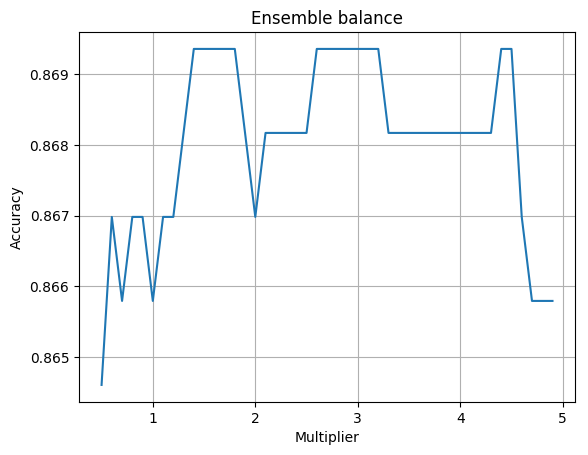

0.86935866983372923

In [16]:
pd_.train_pd_keras_both_svm(data=data)